To be run on perlmutter

In [1]:
import os
import sys
sys.path.insert(0, "/global/cfs/cdirs/m4129/projects/crispy_shifty_adam")

In [ ]:
from crispy_shifty.utils.io import gen_array_tasks

simulation_name = "06_fold_X"
design_list_file = '/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/folded_paired_states.pair'
output_path = f"/pscratch/sd/b/broerman/{simulation_name}"

options = " ".join(
    [
        "out:level 200",
    ]
)
extra_kwargs = {"models": "all", "df_scores": "/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/scores_unique.csv"}

gen_array_tasks(
    distribute_func="crispy_shifty.protocols.folding.fold_dimer_X",
    design_list_file=design_list_file,
    output_path=output_path,
    perlmutter_mode=True,
    nstruct=1,
    nstruct_per_task=1,
    options=options,
    extra_kwargs=extra_kwargs,
    simulation_name=simulation_name,
    time="30:00",
)

/global/cfs/cdirs/m4129/projects/crispy_shifty_adam/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


Run the following command with your desired environment active:
sbatch -a 1-216 /pscratch/sd/b/broerman/03_fold_dimer_Y/run.sh


To run on the digs

### Collect scorefiles of the folded state Xs and concatenate

In [2]:
import os, sys
# collect score files of the folded paired state Ys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import collect_score_file

simulation_name = "06_fold_X"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

if not os.path.exists(os.path.join(output_path, "scores.json")):
    collect_score_file(output_path, "scores")

### Load resulting concatenated scorefile
TODO might have to switch to a dask accelerated approach for production

In [3]:
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import parse_scorefile_linear

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df = parse_scorefile_linear(os.path.join(output_path, "scores.json"))

  0%|          | 0/81220 [00:00<?, ?it/s]

### Dump scores_df as a CSV and then reload, for performance reasons

In [4]:
import pandas as pd

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores.csv"))

In [1]:
import pandas as pd
import os
simulation_name = "06_fold_X"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"
scores_df = pd.read_csv(os.path.join(output_path, "scores.csv"), index_col="Unnamed: 0")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df)

,X_mean_pae,X_mean_pae_interaction,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_plddt,X_model,X_pTMscore,X_protomer,X_recycles,X_rmsd_to_input,X_seed,X_tol,X_type,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,full_seq,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mean_pae,mean_pae_interaction,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_plddt,model,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,num_Y_models,omega,pTMscore,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,recycles,ref,remodel_after_loop_A,remodel_after_loop_B,remodel_before_loop_A,remodel_before_loop_B,rmsd_to_input,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,seed,seq_A,seq_B,shift_A,shift_B,ss_sc,tol,total_length_A,total_length_B,total_score,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity
/pscratch/sd/b/broerman/06_fold_X/decoys/0009/06_fold_X_4c223589544043e8863649a25a4557b3.pdb.bz2,3.695731,NaN,3.639637,3.639637,92.612740,2,0.813009,A,3.0,5.674737,0,0.522141,monomer_ptm,3.786106,4.392088,4.169684,4.614491,3.096914,2.982847,3.210981,93.552361,3,0.893484,3.0,1.139753,0,0.162404,monomer_ptm,XAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAGBAAAAAAAA...,XAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAGBAAAAAAAA...,878.952332,134.754211,41.311840,loop_remodel,loop_match,-1.000000,380.977539,530.343567,682.458618,mpnn,41.0,31.0,13.0,0.0,LHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHLLHHHHHHHH...,LHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHLLHHHHHHHH...,3.705534,-3777.825922,1084.928250,40.825238,221.672332,302.745104,-1016.860867,-99.717803,-48.269679,1205.054855,101.467223,117.554454,5005.787022,2332.370965,SLAEELRREAEELERLFPDDPTVIIIAEMAKRAAERGDRVSIALAH...,-28.135174,-0.973769,-22.709460,-475.117947,11.861294,900.103351,4.016512,25.249017,2145.124602,-82.432584,11.030604,7.952436,0.836909,0.831199,3.695731,NaN,3.639637,3.639637,92.612740,2,"0.3,0.7",full,0.2,"75,76","75,76",3.0,113.169767,0.813009,-164.383560,X16_4_16_2_ct7_fe,152.0,8.882830,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,45.620622,-226.113820,3.0,96.53812,1.0,NaN,1.0,NaN,5.674737,-1.0,0.731458,0.780050,0.781111,-973.915222,-163.165192,-690.519470,-686.867859,-403.472137,-197.199875,-368.814087,-171.614212,-179.810043,-3.246384,0,SLAEELRREAEELERLFPDDPTVIIIAEMAKRAAERGDRVSIALAH...,EEAERLRREARELKERFPDNPEVIRAAEHAERAAESGDREAIALAR...,-1.0,1.0,0.768513,0.522141,152.0,152.0,562.978059,monomer_ptm,0.357202,0.298435,0.267852,0.312773,0.842120,0.559867,0.146686,2.331366e-07
/pscratch/sd/b/broerman/06_fold_X/decoys/0009/06_fold_X_c0060bb4109c4da68639035e03b93aa2.pdb.bz2,9.625008,NaN,9.569426,9.569426,70.726768,1,0.680925,B,3.0,10.307023,0,4.559363,monomer_ptm,3.158808,3.617002,3.652253,3.581752,2.650818,2.682879,2.618757,95.453751,5,0.921586,3.0,1.048091,0,0.266917,monomer_ptm,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,124.985054,61.185627,61.185627,loop_match,loop_match,-1.000000,373.089539,597.030579,603.572021,mpnn,18.0,33.0,13.0,0.0,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,72.176247,-4261.170882,1208.793952,56.12

### Data exploration
Gonna remove the Rosetta sfxn scoreterms for now

In [6]:
sample_df = scores_df.sample(1000, random_state=0)

### Remove score terms we don't care about

In [7]:
import sys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.protocols.design import beta_nov16_terms

sample_df = sample_df[
    [term for term in sample_df.columns if term not in beta_nov16_terms]
]
print(len(sample_df))
print(list(sample_df.columns))

1000
['X_mean_pae', 'X_mean_pae_interaction', 'X_mean_pae_intra_chain', 'X_mean_pae_intra_chain_A', 'X_mean_plddt', 'X_model', 'X_pTMscore', 'X_protomer', 'X_recycles', 'X_rmsd_to_input', 'X_seed', 'X_tol', 'X_type', 'Y_mean_pae', 'Y_mean_pae_interaction', 'Y_mean_pae_interaction_AB', 'Y_mean_pae_interaction_BA', 'Y_mean_pae_intra_chain', 'Y_mean_pae_intra_chain_A', 'Y_mean_pae_intra_chain_B', 'Y_mean_plddt', 'Y_model', 'Y_pTMscore', 'Y_recycles', 'Y_rmsd_to_reference', 'Y_seed', 'Y_tol', 'Y_type', 'abego_str_A', 'abego_str_B', 'bb_clash', 'bb_clash_A', 'bb_clash_B', 'closure_type_A', 'closure_type_B', 'cms_ac_bn', 'cms_dhr', 'cms_dhr_ac', 'cms_dhr_bn', 'designed_by', 'dhr_ac_int_count', 'dhr_bn_int_count', 'dhr_int_count', 'dssp_A', 'dssp_B', 'elapsed_time', 'full_seq', 'loop_dist_A', 'loop_dist_B', 'loop_sc_A', 'loop_sc_B', 'mean_pae', 'mean_pae_interaction', 'mean_pae_intra_chain', 'mean_pae_intra_chain_A', 'mean_plddt', 'model', 'mpnn_msd_betas', 'mpnn_msd_design_area', 'mpnn_msd_t

### Plot AF2 metrics

4it [00:00, 43.18it/s]


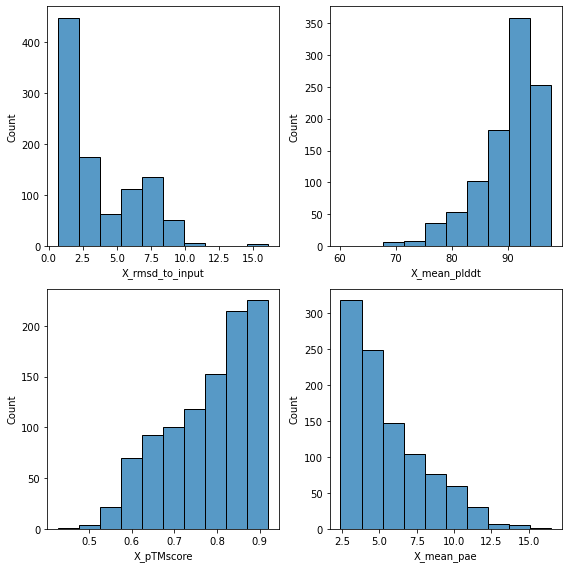

In [12]:
import matplotlib.pyplot as plt
from crispy_shifty.utils.plotting import histplot_df, pairplot_df

cols = [
    "X_rmsd_to_input",
    "X_mean_plddt",
    "X_pTMscore",
    "X_mean_pae",
]
the_fig = histplot_df(
    df=sample_df,
    cols=cols,
    bins=10,
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores.png"))

<Figure size 1152x1152 with 0 Axes>

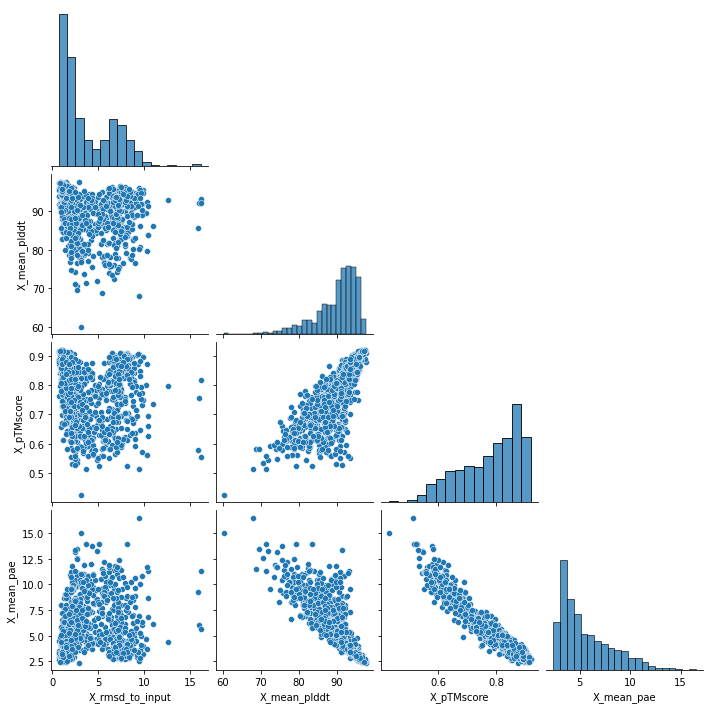

In [10]:
the_fig = pairplot_df(
    df=sample_df,
    cols=cols,
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_paired.png"))

### Plot effects of MPNN beta distribution on AF2 metrics

4it [00:00, 26.51it/s]


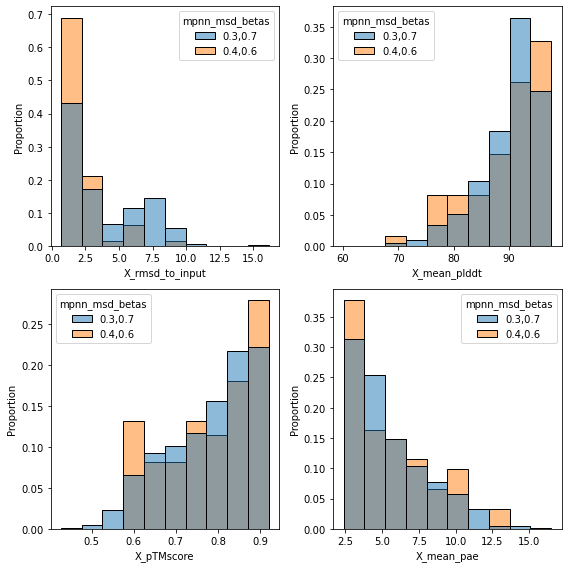

In [15]:
cols = [
    "X_rmsd_to_input",
    "X_mean_plddt",
    "X_pTMscore",
    "X_mean_pae",
]
the_fig = histplot_df(
    df=sample_df,
    cols=cols,
    bins=10,
    hue="mpnn_msd_betas",
    stat="proportion",
    common_norm=False,
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_area.png"))

<Figure size 1152x1152 with 0 Axes>

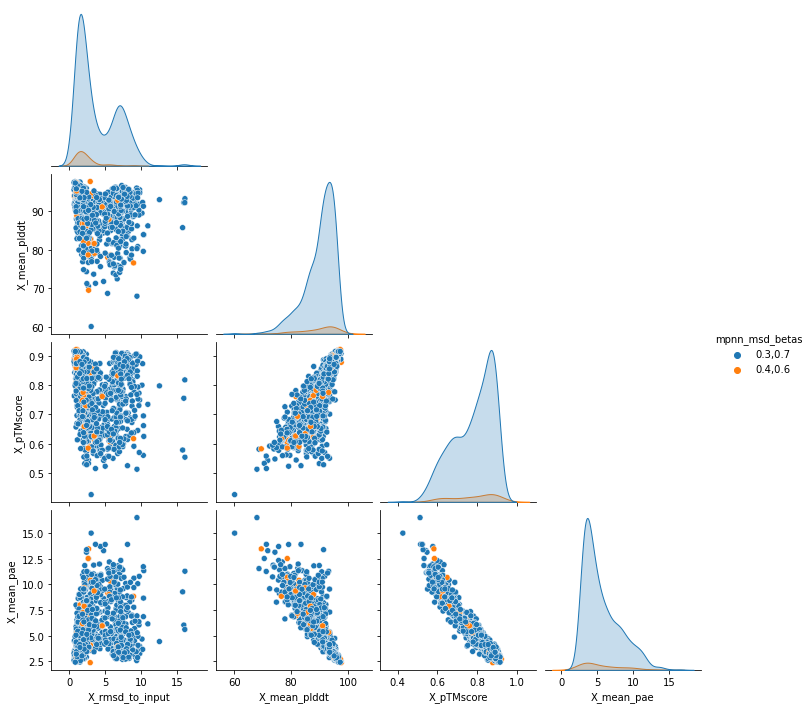

In [17]:
cols = [
    "X_rmsd_to_input",
    "X_mean_plddt",
    "X_pTMscore",
    "X_mean_pae",
]
the_fig = pairplot_df(
    df=sample_df,
    cols=cols,
    hue="mpnn_msd_betas",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_paired.png"))

In [2]:
# initial filtering
filtered_df = scores_df.query("X_rmsd_to_input < 2 and X_mean_plddt > 85 and X_pTMscore > 0.7 and X_mean_pae < 10")
len(filtered_df)

28522

4it [00:00, 12.71it/s]


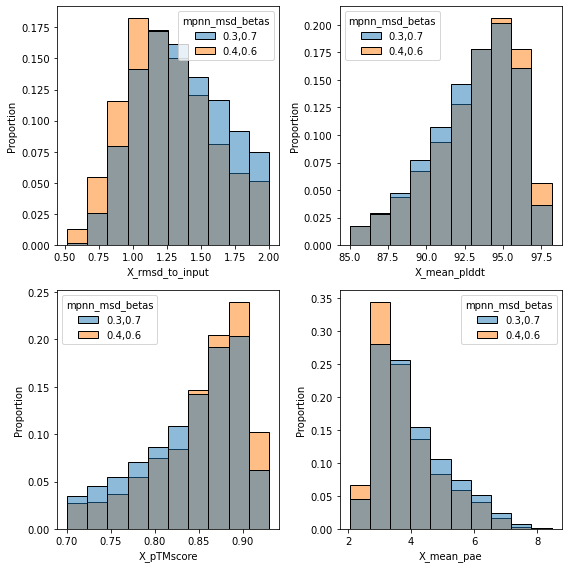

In [23]:
cols = [
    "X_rmsd_to_input",
    "X_mean_plddt",
    "X_pTMscore",
    "X_mean_pae",
]
the_fig = histplot_df(
    df=filtered_df,
    cols=cols,
    bins=10,
    hue="mpnn_msd_betas",
    stat="proportion",
    common_norm=False,
)

In [ ]:
if not os.path.exists(os.path.join(output_path, "scores_filtered.csv")):
    filtered_df.to_csv(os.path.join(output_path, "scores_filtered.csv"))

In [3]:
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(filtered_df)

,X_mean_pae,X_mean_pae_interaction,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_plddt,X_model,X_pTMscore,X_protomer,X_recycles,X_rmsd_to_input,X_seed,X_tol,X_type,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,full_seq,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mean_pae,mean_pae_interaction,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_plddt,model,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,num_Y_models,omega,pTMscore,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,recycles,ref,remodel_after_loop_A,remodel_after_loop_B,remodel_before_loop_A,remodel_before_loop_B,rmsd_to_input,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,seed,seq_A,seq_B,shift_A,shift_B,ss_sc,tol,total_length_A,total_length_B,total_score,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity
/pscratch/sd/b/broerman/06_fold_X/decoys/0009/06_fold_X_8ee659467ba14e12b5c182316ad40ee4.pdb.bz2,4.578236,NaN,4.486450,4.486450,92.148666,1,0.762120,A,3.0,1.485154,0,0.174729,monomer_ptm,3.376287,4.056025,3.858613,4.253436,2.651107,2.378187,2.924027,94.909607,5,0.895426,3.0,0.909380,0,0.995529,monomer_ptm,XAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAABABAAAAAAAAA...,XAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAABABAAAAAAAAA...,3654.935059,42.597462,42.597462,loop_match,loop_match,-1.000000,386.913940,608.956848,447.142944,mpnn,32.0,18.0,21.0,0.0,LHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHLLLHHHHHHHHH...,LHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHLLLHHHHHHHHH...,82.749496,-3558.724551,1019.851463,34.306011,241.904711,247.197630,-1024.693289,-97.145004,-67.808722,1094.294755,96.346353,110.127719,10843.889511,2277.841188,KEEQVRRLIEEAIEAAERGDVLRAVRAALALAEVAESREEAVRLLI...,-27.767730,-11.530497,-37.436663,-456.236960,59.154985,926.779224,3.573436,26.909384,2160.238382,-41.320650,10.160695,10.977591,0.845787,0.749853,4.578236,NaN,4.486450,4.486450,92.148666,1,"0.3,0.7",full,0.2,"72,73,74","72,73,74",1.0,107.901437,0.762120,-185.678521,X17_3_14_3_ct18_fg,148.0,10.437054,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,6.511245,-226.210015,3.0,176.90858,NaN,NaN,NaN,NaN,1.485154,-1.0,0.789517,0.774118,0.675156,-851.169678,-149.866974,-622.256836,-583.822571,-354.909698,-166.792755,-329.128998,-162.336243,-141.901657,-2.935068,0,KEEQVRRLIEEAIEAAERGDVLRAVRAALALAEVAESREEAVRLLI...,REREVEELVRRAVEAAERGDFEEAREAAEELARVADSREEALTLLA...,1.0,-5.0,0.753131,0.174729,148.0,148.0,3928.771887,monomer_ptm,0.355769,0.389219,0.370233,0.385622,0.389458,0.649667,0.117230,2.439962e-10
/pscratch/sd/b/broerman/06_fold_X/decoys/0009/06_fold_X_6bebda7842a2454baf4a72a817b50cc4.pdb.bz2,3.869711,NaN,3.764952,3.764952,93.149750,3,0.857534,A,3.0,1.687258,0,0.107038,monomer_ptm,5.861937,7.233359,7.521684,6.945035,4.397666,5.364787,3.430545,90.954857,3,0.867150,3.0,1.401116,0,1.327143,monomer_ptm,XAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAA...,1212.350830,1152.583130,59.767792,loop_remodel,loop_remodel,-1.000000,493.790741,713.337891,779.784058,mpnn,37.0,35.0,19.0,0.0,LHHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHH...,LHHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHH...,5.298653,-5111.717145,14

In [12]:
# get unique sequences

x_af2_cols = ["X_mean_pae", "X_mean_pae_interaction", "X_mean_pae_intra_chain", "X_mean_pae_intra_chain_A", "X_mean_plddt", "X_model", "X_pTMscore", "X_recycles", "X_rmsd_to_input", "X_seed", "X_tol", "X_type", "num_X_models"]

unique_seqs = set(filtered_df["full_seq"])

unique_dict = {}
for unique_seq in unique_seqs:
    combo_df = filtered_df.query(f"full_seq == '{unique_seq}'")
    if combo_df['X_protomer'].nunique() < 2:
        continue
    best_scores_list = []
    for protomer in "AB":
        protomer_df = combo_df.query(f"X_protomer == '{protomer}'")
        best_index = protomer_df['X_mean_plddt'].idxmax()
        best_scores = protomer_df.loc[best_index]
        best_scores["num_X_models"] = len(protomer_df)
        best_scores.rename(index={col: f"{protomer}_{col}" for col in x_af2_cols}, inplace=True)
        best_scores_list.append(best_scores)
    unique_dict[unique_seq] = pd.concat(best_scores_list).drop("X_protomer").sort_index()
unique_df = pd.DataFrame.from_dict(unique_dict, orient="index")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(unique_df)

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/pandas/core/generic.py:1161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

,A_X_mean_pae,A_X_mean_pae_interaction,A_X_mean_pae_intra_chain,A_X_mean_pae_intra_chain_A,A_X_mean_plddt,A_X_model,A_X_pTMscore,A_X_recycles,A_X_rmsd_to_input,A_X_seed,A_X_tol,A_X_type,A_num_X_models,B_X_mean_pae,B_X_mean_pae_interaction,B_X_mean_pae_intra_chain,B_X_mean_pae_intra_chain_A,B_X_mean_plddt,B_X_model,B_X_pTMscore,B_X_recycles,B_X_rmsd_to_input,B_X_seed,B_X_tol,B_X_type,B_num_X_models,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,full_seq,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mean_pae,mean_pae_interaction,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_plddt,model,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,num_Y_models,omega,pTMscore,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,recycles,ref,remodel_after_loop_A,remodel_after_loop_B,remodel_before_loop_A,remodel_before_loop_B,rmsd_to_input,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,seed,seq_A,seq_B,shift_A,shift_B,ss_sc,tol,total_length_A,total_length_B,total_score,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity
ARELVEAARRALERLAADPSDRDAREEARTALEEAARRAVREGDAEIAGRVAVLALELLWLDPDDADARRLVRRALRVLLALVLRESGAEGAVRAAELALELLRRDPDDAAARELARRALRVALERAEKENDAEIAERVARLAERLAELDPDDEEARRLAERARRAAERLRERRGL/ARELVEEARRALERLRADPSDEEARDRARRALERALEVAKKEGDARVALEVAILALDLLQVRPDDADARRLVLEAVEVALEIGKKRGRPVGALAVAALAILLLLWRPDDADARRLALEALEAALELAKKRNDAEVARAVADLARRLLDARPDDAEAARLAERAAEAAREIERKNGL,3.108984,NaN,2.996321,2.996321,95.747429,5,0.879492,3.0,1.536598,0,0.056215,monomer_ptm,5,3.816462,NaN,3.704110,3.704110,94.299644,3,0.842699,3.0,1.126294,0,0.103900,monomer_ptm,5,4.494983,5.351904,5.174434,5.529375,3.544076,3.602229,3.485923,92.920250,1,0.857405,3.0,1.446266,0,0.404098,monomer_ptm,XAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAAAAGBAA...,176.549957,121.928787,54.621174,loop_remodel,loop_remodel,-1.0,442.373474,543.028625,685.864441,mpnn,19.0,30.0,4.0,0.0,LHHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHHHHHLLLHH...,LHHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHHHHHLLLHH...,4.202769,-4327.506251,1279.617676,59.126885,274.832089,423.865314,-1351.370428,-141.404896,-72.252497,1419.799442,126.893725,153.420593,7387.593371,2863.015899,ARELVEAARRALERLAADPSDRDAREEARTALEEAARRAVREGDAE...,-24.356714,-20.251384,-54.438828,-573.652316,12.013145,1140.603722,2.763765,23.934571,2677.136670,-62.525727,8.816786,12.989257,0.745489,0.727166,3.108984,NaN,3.704110,2.996321,95.747429,5,"0.3,0.7",full,0.2,"87,88","87,88",1.0,163.133050,0.842699,-203.602204,X17_4_21_2_ct3_fd,176.0,8.903041,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,19.376059,-199.537525,3.0,119.78840,1.0,3.0,3.0,1.0,1.536598,-1.0,0.782178,0.774403,0.785740,-1173.055176,-203.918747,-830.988037,-852.127563,-510.060364,-230.526413,-457.216187,-226.689774,-236.218124,-3.370848,0,ARELVEAARRALERLAADPSDRDAREEARTALEEAARRAVREGDAE...,ARELVEEARRALERLRADPSDEEARDRARRALERALEVAKKEGDAR...,5.0,-1.0,0.745806,0.056215,176.0,176.0,1565.651053,monomer_ptm,0.274176,0.308063,0.282794,0.299960,1.129254,0.825609,0.104028,0.000000e+00
RLAERVAELARRQGASEEEARRLRELAARSAAAAAVLALALRNGASAEEAILLGLAAAGSEAAARVAALALRNGTSAEERARLMRLAIESA

In [15]:
if not os.path.exists(os.path.join(output_path, "scores_unique.csv")):
    unique_df.to_csv(os.path.join(output_path, "scores_unique.csv"))

The above might be some way to get unique sequences, but I've probably already written something better to pair and parse everything.
Do more combining to end up getting each design as one row in the dataframe, with Y_plddt, X_A_plddt, and X_B_plddt for example. For each model of X and Y, compute the RMSD to the best plddt model. Then based on an RMSD cutoff, compute the number of correctly folded models, the number which fold to the other state, and the number which fold to a different state. You'll need Y_Y_count (for correct state Y binding), Y_Y_A_count (for Y predictions of A folding into Y), Y_Y_B_count (for Y predictions of B folding into Y), Y_X_A_count (for Y predictions of A folding into X), Y_X_B_count (for Y predictions of B folding into X), Y_U_A_count (for Y predictions of A folding into U), Y_U_B_count (for Y predictions of B folding into U), X_X_A_count (for X predictions of A folding into X), X_X_B_count (for X predictions of B folding into X), X_Y_A_count (for X predictions of A folding into Y), X_Y_B_count (for X predictions of B folding into Y), X_U_A_count (for X predictions of A folding into U), and X_U_B_count (for X predictions of B folding into U).